# ANZ virtual internship 
## Feature engineering

Using the same transaction dataset, identify the annual salary for each customer

Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
%matplotlib inline

In [2]:
df = pd.read_excel('clean_anz.xlsx')
df.head(2)

,status,card_present_flag,account,currency,txn_description,merchant_id,first_name,balance,gender,age,...,merchant_long_lat,movement,date,month,weekday,day,time,hour,c_long,c_lat
0,authorized,1.0,ACC-1598451071,AUD,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,F,26,...,153.38 -27.99,debit,2018-08-01,8,2,1,01:01:15,1,153.41,-27.95
1,authorized,0.0,ACC-1598451071,AUD,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,F,26,...,151.21 -33.87,debit,2018-08-01,8,2,1,01:13:45,1,153.41,-27.95


## Feature engineering

#### Bin age to categories

In [3]:
df['age']

0        26
1        26
2        38
3        40
4        26
         ..
11915    30
11916    20
11917    28
11918    69
11919    31
Name: age, Length: 11920, dtype: int64

In [4]:
def agebin(age):
    if age < 20:
        return 'below20'
    elif (age >= 20) & (age < 40):
        return 'btwn20n40'
    elif (age >= 40) & (age < 60):
        return 'btwn40n60'
    else:
        return '60+'

In [5]:
df['age_bin'] = df['age'].apply(lambda x: agebin(x))

In [6]:
df['age_bin']

0        btwn20n40
1        btwn20n40
2        btwn20n40
3        btwn40n60
4        btwn20n40
           ...    
11915    btwn20n40
11916    btwn20n40
11917    btwn20n40
11918          60+
11919    btwn20n40
Name: age_bin, Length: 11920, dtype: object

#### State of customers

In [7]:
# count number of transactions per customer per state
state_df = df.groupby(['customer_id', 'merchant_state']).count()

In [8]:
state_df['transaction_id']

customer_id     merchant_state
CUS-1005756958  NSW                9
                QLD               39
CUS-1117979751  NSW                9
                SA                 2
                VIC                2
                                  ..
CUS-883482547   NSW               96
                QLD                3
                SA                 4
                VIC                5
                WA                12
Name: transaction_id, Length: 408, dtype: int64

In [9]:
# convert numpy array to list
id_and_state = state_df.index.tolist()

In [10]:
# convert list of tuples to list of lists
id_and_state = [list(i) for i in id_and_state] 

In [11]:
id_and_state[0]

['CUS-1005756958', 'NSW']

In [12]:
# add the number of transation by customer in a state to list
for i in range(len(state_df)):
    id_and_state[i].append(state_df['transaction_id'][i])

In [13]:
id_and_state[0]

['CUS-1005756958', 'NSW', 9]

In [14]:
# group customer_id as keys in dictionary
grouped = {}
for i in id_and_state:
    if i[0] not in grouped:
        grouped[i[0]] = []
    grouped[i[0]].append(i[1:])

In [15]:
grouped

{'CUS-1005756958': [['NSW', 9], ['QLD', 39]],
 'CUS-1117979751': [['NSW', 9], ['SA', 2], ['VIC', 2], ['WA', 39]],
 'CUS-1140341822': [['NSW', 5], ['QLD', 3], ['SA', 1], ['VIC', 55], ['WA', 1]],
 'CUS-1147642491': [['NSW', 61], ['QLD', 1], ['SA', 4], ['VIC', 2], ['WA', 8]],
 'CUS-1196156254': [['ACT', 23],
  ['NSW', 42],
  ['QLD', 3],
  ['SA', 59],
  ['VIC', 6],
  ['WA', 30]],
 'CUS-1220154422': [['NSW', 20], ['QLD', 13], ['VIC', 3], ['WA', 12]],
 'CUS-1233833708': [['NSW', 2], ['QLD', 1], ['VIC', 22]],
 'CUS-1271030853': [['NSW', 1], ['QLD', 1], ['SA', 3], ['VIC', 60]],
 'CUS-127297539': [['NSW', 33],
  ['QLD', 3],
  ['SA', 6],
  ['VIC', 2],
  ['WA', 110]],
 'CUS-134193016': [['NSW', 1], ['SA', 1], ['VIC', 25]],
 'CUS-134833760': [['NSW', 7],
  ['NT', 1],
  ['QLD', 1],
  ['SA', 1],
  ['VIC', 1],
  ['WA', 32]],
 'CUS-1388323263': [['SA', 3], ['VIC', 50]],
 'CUS-1433879684': [['NSW', 5], ['QLD', 2], ['SA', 6], ['VIC', 96], ['WA', 1]],
 'CUS-1462656821': [['NSW', 55], ['SA', 2], ['VIC', 3

In [16]:
# get the state where custoner has made most transactions
c_states = []
# for each cutomer_id key 
for i in grouped: 
    print(i)
    print(grouped[i])
    biggest = [0]
# find the biggest between lists behind a key
    for l in range(len(grouped[i])): # 
        if grouped[i][l][1] > biggest:
            biggest = grouped[i][l][1]
            st = grouped[i][l][0]
#   print(biggest) 
    print(st)
    c_states.append(st)

CUS-1005756958
[['NSW', 9], ['QLD', 39]]
QLD
CUS-1117979751
[['NSW', 9], ['SA', 2], ['VIC', 2], ['WA', 39]]
WA
CUS-1140341822
[['NSW', 5], ['QLD', 3], ['SA', 1], ['VIC', 55], ['WA', 1]]
VIC
CUS-1147642491
[['NSW', 61], ['QLD', 1], ['SA', 4], ['VIC', 2], ['WA', 8]]
NSW
CUS-1196156254
[['ACT', 23], ['NSW', 42], ['QLD', 3], ['SA', 59], ['VIC', 6], ['WA', 30]]
SA
CUS-1220154422
[['NSW', 20], ['QLD', 13], ['VIC', 3], ['WA', 12]]
NSW
CUS-1233833708
[['NSW', 2], ['QLD', 1], ['VIC', 22]]
VIC
CUS-1271030853
[['NSW', 1], ['QLD', 1], ['SA', 3], ['VIC', 60]]
VIC
CUS-127297539
[['NSW', 33], ['QLD', 3], ['SA', 6], ['VIC', 2], ['WA', 110]]
WA
CUS-134193016
[['NSW', 1], ['SA', 1], ['VIC', 25]]
VIC
CUS-134833760
[['NSW', 7], ['NT', 1], ['QLD', 1], ['SA', 1], ['VIC', 1], ['WA', 32]]
WA
CUS-1388323263
[['SA', 3], ['VIC', 50]]
VIC
CUS-1433879684
[['NSW', 5], ['QLD', 2], ['SA', 6], ['VIC', 96], ['WA', 1]]
VIC
CUS-1462656821
[['NSW', 55], ['SA', 2], ['VIC', 3], ['WA', 4]]
NSW
CUS-1478398256
[['NSW', 6], ['Q

In [17]:
c_states = pd.DataFrame(c_states, columns=['state'])

In [18]:
# get list of customer_id in the same order as states is
def getList(dict): 
    list = [] 
    for key in dict.keys(): 
        list.append(key) 
          
    return list
      
c_ids = getList(grouped)

In [19]:
customer_state_df = pd.DataFrame(c_ids, columns=['id'])

In [20]:
# match id with state
customer_state_df = pd.concat([customer_state_df, c_states], axis=1)

In [21]:
customer_state_df

,id,state
0,CUS-1005756958,QLD
1,CUS-1117979751,WA
2,CUS-1140341822,VIC
3,CUS-1147642491,NSW
4,CUS-1196156254,SA
...,...,...
94,CUS-72755508,NSW
95,CUS-809013380,NSW
96,CUS-860700529,QLD
97,CUS-880898248,VIC


In [22]:
customer_state_df[customer_state_df['id']=='CUS-1140341822']['state'].item()

'VIC'

In [23]:
# get cutomer state to transaction data
customer_state = []

for i in df['customer_id']:
    customer_state.append(customer_state_df[customer_state_df['id']==i]['state'].item())
    
df['state'] = customer_state

#### Annual salary for each customer

In [24]:
# make a new dataframe with only salary payments
df_salaries = df[df['txn_description']=='PAY/SALARY'].groupby('customer_id').sum()

In [25]:
# divide the sum of each customer's salary payment with 3 to get an average monthly pay 
# and then multiply with 12 to get an annual salary
annual_salaries = df_salaries['amount']/3*12 # annual salary for each customer

In [26]:
annual_salaries.loc['CUS-1005756958']

50464.44

In [27]:
# match every customer_id with their calculated annual salary
salaries = []

for i in df['customer_id']:
    salaries.append(int(annual_salaries.loc[i]))
    
df['annual_salary'] = salaries

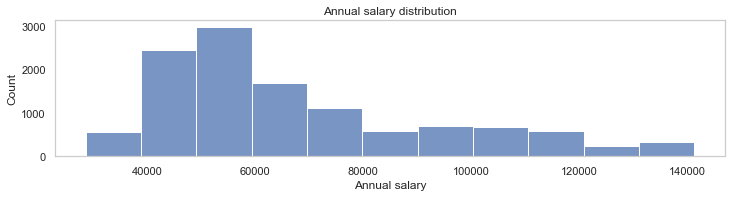

In [48]:
# skewed distribution
fig, ax = plt.subplots(figsize=(12,2.5))
plt.grid(False)
plt.title('Annual salary distribution')
plt.xlabel('Annual salary')
sns.histplot(ax=ax, data=df['annual_salary'], bins=11);
# plt.savefig('annual_salary_dist_V.jpg')

### POS or SALES-POS purchase transactions

In [30]:
# 'POS' + 'SALES-POS' VS rest of transactions
pos_df = df[(df['txn_description']=='POS') | (df['txn_description']=='SALES-POS')]

#### Number of purchase transactions per week

In [31]:
# count number of purchases per customer
pos_trans_df = pos_df.groupby('customer_id').count()

In [34]:
# average number of purchases per week for customer
weekly_purch = round(pos_trans_df['transaction_id']/7, 0)

In [35]:
# average number of transactions per week for customer
avg_weekly_purch_num = []

for i in df['customer_id']:
    avg_weekly_purch_num.append(int(weekly_purch.loc[i]))
    
df['avg_weekly_purch_num'] = avg_weekly_purch_num

#### Number of transactions per week overall

In [38]:
# count number of transactions per customer
trans_df = df.groupby('customer_id').count()

In [39]:
# average number of transactions per week for customer
weekly_trans = round(trans_df['transaction_id']/7, 0)

In [40]:
# average number of transactions per week for customer
avg_weekly_trans_num = []

for i in df['customer_id']:
    avg_weekly_trans_num.append(int(weekly_trans.loc[i]))
    
df['avg_weekly_trans_num'] = avg_weekly_trans_num

#### Purchase transaction days

In [43]:
# number of days with transactions per customer. Do they make purchases every day?
pos_df[pos_df['customer_id']=='CUS-809013380']['date'].nunique()

29

In [44]:
no_trans_days = []

for i in df['customer_id']:
    no_trans_days.append(pos_df[pos_df['customer_id']==i]['date'].nunique())

In [45]:
df['no_trans_days'] = no_trans_days

#### Average purchase amount

In [46]:
int(round(pos_df[pos_df['customer_id']=='CUS-809013380']['amount'].mean(), 0))

27

In [47]:
avg_trans_amount = []

for i in df['customer_id']:
    avg_trans_amount.append(int(round(pos_df[pos_df['customer_id']==i]['amount'].mean(), 0)))

In [48]:
df['avg_trans_amount'] = avg_trans_amount

#### Max purchase amount

In [49]:
round(pos_df[pos_df['customer_id']=='CUS-809013380']['amount'].max(), 1)

377.8

In [50]:
max_amount = []

for i in df['customer_id']:
    max_amount.append(round(pos_df[pos_df['customer_id']==i]['amount'].max(), 1))

In [51]:
df['max_amount'] = max_amount

#### Number of large transactions 

In [52]:
pos_df[(pos_df['customer_id']=='CUS-2178051368') & (pos_df['amount']>100)]['amount'].count()

1

In [53]:
num_large_trans = []

for i in df['customer_id']:
    num_large_trans.append(pos_df[(pos_df['customer_id']==i) & (pos_df['amount']>100)]['amount'].count())

In [54]:
df['num_large_trans'] = num_large_trans

#### Average transaction amount overall

In [55]:
int(round(df[df['customer_id']=='CUS-809013380']['amount'].mean(), 0))

152

In [56]:
avg_trans_amount_overall = []

for i in df['customer_id']:
    avg_trans_amount_overall.append(int(round(df[df['customer_id']==i]['amount'].mean(), 0)))

In [57]:
df['avg_trans_amount_overall'] = avg_trans_amount_overall

#### Average balance

In [58]:
df[df['customer_id']=='CUS-809013380']['balance'].median()

3123.7749999999996

In [59]:
med_balance = []

for i in df['customer_id']:
    med_balance.append(df[df['customer_id']==i]['balance'].median())

In [60]:
df['med_balance'] = med_balance

## All together

In [91]:
# salaries = []
# customer_state = []
# avg_weekly_purch_num = []
# avg_weekly_trans_num = []
# no_trans_days = []
# avg_trans_amount = []
# max_amount = []
# num_large_trans = []
# avg_trans_amount_overall = []
# med_balance = []

# for i in df['customer_id']:
#     salaries.append(int(annual_salaries.loc[i]))
#     customer_state.append(customer_state_df[customer_state_df['id']==i]['state'].item())
#     avg_weekly_purch_num.append(int(weekly_purch.loc[i]))
#     avg_weekly_trans_num.append(int(weekly_trans.loc[i]))
#     no_trans_days.append(pos_df[pos_df['customer_id']==i]['date'].nunique())
#     avg_trans_amount.append(int(round(pos_df[pos_df['customer_id']==i]['amount'].mean(), 0)))
#     max_amount.append(round(pos_df[pos_df['customer_id']==i]['amount'].max(), 1))
#     num_large_trans.append(pos_df[(pos_df['customer_id']==i) & (pos_df['amount']>100)]['amount'].count())
#     avg_trans_amount_overall.append(int(round(df[df['customer_id']==i]['amount'].mean(), 0)))
#     med_balance.append(df[df['customer_id']==i]['balance'].median())
    
# df['annual_salary'] = salaries  
# df['state'] = customer_state
# df['avg_weekly_purch_num'] = avg_weekly_purch_num
# df['avg_weekly_trans_num'] = avg_weekly_trans_num
# df['no_trans_days'] = no_trans_days
# df['avg_trans_amount'] = avg_trans_amount
# df['max_amount'] = max_amount
# df['num_large_trans'] = num_large_trans
# df['avg_trans_amount_overall'] = avg_trans_amount_overall
# df['med_balance'] = med_balance

# Output file with new features

In [61]:
df.to_excel('anz_new_feats.xlsx', index=False)
print('File saved!')

File saved!
